In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [183]:
train['excerpt'].shape

(2834,)

In [184]:
test['excerpt'].shape

(7,)

In [185]:
test.isna().sum()

id           0
url_legal    4
license      4
excerpt      0
dtype: int64

In [102]:
import math
arr1=[]
for i in train['target']:
    if i>0:
        if i<0.5:
            arr1.append(math.floor(i))
        else:
            if i>=0.5:
                arr1.append(math.ceil(i))
    else:
        if i<0:
            if i<-0.5:
                arr1.append(math.floor(i))
            else:
                if i>=-0.5:
                    arr1.append(math.ceil(i))
                
                

In [103]:
np.unique(arr1)

array([-4, -3, -2, -1,  0,  1,  2])

In [104]:
np.unique(train['target'])



array([-3.67626777, -3.66836041, -3.64289216, ...,  1.58384683,
        1.59786984,  1.71138983])

In [105]:
import math
for i in range(len(train['target'])):
    if train['target'][i]==0:
        train['target'][i]=0
    if train['target'][i]>0:
        if train['target'][i]<0.5:
            train['target'][i]=math.floor(train['target'][i])
        else:
            if train['target'][i]>=0.5:
                train['target'][i]=math.ceil(train['target'][i])
    else:
        if train['target'][i]<0:
            if train['target'][i]<-0.5:
                train['target'][i]=math.floor(train['target'][i])
            else:
                if train['target'][i]>=-0.5:
                    train['target'][i]=math.ceil(train['target'][i])
       

<ipython-input-105-3d8f2e70b169>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'][i]=math.ceil(train['target'][i])
<ipython-input-105-3d8f2e70b169>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'][i]=math.floor(train['target'][i])
<ipython-input-105-3d8f2e70b169>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'][i]=math.floor(train['target'][i])
<ipython-input-105-3d8f2e70b169>:10: Setti

In [106]:
train['target']=train['target'].astype('int')

In [107]:
np.unique(train['target'])

array([-4, -3, -2, -1,  0,  1,  2])

In [108]:
train.isna().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [109]:
train['target']

0       0
1       0
2      -1
3      -2
4       0
       ..
2829    2
2830    0
2831    0
2832    0
2833    0
Name: target, Length: 2834, dtype: int32

In [110]:
train.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-1.232181,0.491435
std,1.322539,0.034818
min,-4.000000,0.000000
25%,-2.000000,0.468543
50%,-1.000000,0.484721
75%,0.000000,0.506268
max,2.000000,0.649671


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   int32  
 5   standard_error  2834 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 121.9+ KB


In [112]:
#STEP #2: VISUALIZE DATASET

In [113]:
# Let's see which message is the most popular ham/spam message
train.groupby('target').describe()

standard_error                                                    \
                count      mean       std       min       25%       50%   
target                                                                    
-4               75.0  0.581822  0.033385  0.526246  0.554459  0.575816   
-3              421.0  0.511025  0.027608  0.453960  0.493488  0.508406   
-2              835.0  0.477933  0.020923  0.433708  0.462501  0.475055   
-1              538.0  0.472414  0.018860  0.428233  0.459453  0.470187   
 0              742.0  0.486529  0.028090  0.000000  0.472461  0.484895   
 1              167.0  0.525572  0.028699  0.470943  0.503848  0.524100   
 2               56.0  0.570362  0.036123  0.504840  0.547811  0.554253   

                            
             75%       max  
target                      
-4      0.603901  0.649671  
-3      0.526147  0.622350  
-2      0.491425  0.568885  
-1      0.483420  0.558600  
 0      0.499249  0.567713  
 1      0.541030  0.606161  
 2      0.597328  0.648474

In [114]:
# Let's get the length of the messages
train['length'] = train['excerpt'].apply(len)
train.head()


,id,url_legal,license,excerpt,target,standard_error,length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,0,0.464009,992
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",0,0.480805,937
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-1,0.476676,908
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-2,0.450007,909
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0,0.510845,723


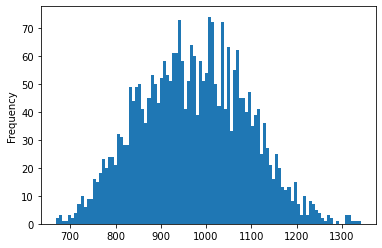

In [115]:
train['length'].plot(bins=100, kind='hist') 

In [116]:
train.length.describe()

count    2834.000000
mean      971.732534
std       117.257343
min       669.000000
25%       885.000000
50%       971.000000
75%      1058.000000
max      1341.000000
Name: length, dtype: float64

In [117]:
# Let's see the longest message 
train[train['length'] == max(train['length'])]['excerpt'].iloc[0]

"A major step forward in pacemaker function has been to attempt to mimic nature by utilizing various inputs to produce a rate-responsive pacemaker using parameters such as the QT interval, pO2 � pCO2 (dissolved oxygen or carbon dioxide levels) in the arterial-venous system, physical activity as determined by an accelerometer, body temperature, ATP levels, adrenaline, etc. Instead of producing a static, predetermined heart rate, or intermittent control, such a pacemaker, a 'Dynamic Pacemaker', could compensate for both actual respiratory loading and potentially anticipated respiratory loading. The first dynamic pacemaker was invented by Anthony Rickards of the National Heart Hospital, London, UK, in 1982.\nDynamic pacemaking technology could also be applied to future artificial hearts. Advances in transitional tissue welding would support this and other artificial organ/joint/tissue replacement efforts. Stem cells may be of interest in transitional tissue welding.\nMany advancements hav

In [118]:
cls1 = train[train['target']==-4]
cls2 = train[train['target']==-3]
cls3 = train[train['target']==-2]
cls4 = train[train['target']==-2]
cls5 = train[train['target']==0]
cls6 = train[train['target']==1]
cls7 = train[train['target']==2]

In [119]:
cls1

,id,url_legal,license,excerpt,target,standard_error,length
10,c57b50918,NaN,NaN,It was believed by the principal men of Virgin...,-4,0.553260,1105
344,c56b17080,https://en.wikipedia.org/wiki/Electric_charge,CC BY-SA 3.0,Charge is the fundamental property of forms of...,-4,0.642028,1229
354,7c732b8bb,https://en.wikipedia.org/wiki/Environmental_sc...,CC BY-SA 3.0,Environmental science is an interdisciplinary ...,-4,0.555843,1253
375,273baf218,https://en.wikipedia.org/wiki/Fulldome,CC BY-SA 3.0,Fulldome refers to immersive dome-based video ...,-4,0.648733,1217
457,29cd28197,https://en.wikipedia.org/wiki/Light-year,CC BY-SA 3.0,The light-year is a unit of length used to exp...,-4,0.581264,1062
...,...,...,...,...,...,...,...
2625,9cbc92ce1,NaN,NaN,"The next contest was that with the cestus, the...",-4,0.532321,1019
2654,04ade0eb2,NaN,NaN,"While I was hailing the brig, I spied a tract ...",-4,0.544735,857
2726,c4704e381,NaN,NaN,Dr. Eder has for a considerable time directed ...,-4,0.541969,1128
2735,a60686533,NaN,NaN,"In 1820 Mr. Cecil, of Cambridge, proposed the ...",-4,0.566617,937


In [120]:
cls2

,id,url_legal,license,excerpt,target,standard_error,length
11,8d8a2667f,NaN,NaN,This Pedrarias was seventy-two years old. He w...,-3,0.518351,873
23,66f0a9ff1,NaN,NaN,If nature afflicts in one direction she freque...,-3,0.526079,956
120,833efe648,NaN,NaN,In those days there were none of the thousand ...,-3,0.513090,912
127,0cdf53452,NaN,NaN,It so happened that Worcester was captain of B...,-3,0.521126,1108
130,ed7084c72,NaN,NaN,The team to play in any match was always put u...,-3,0.472213,1050
...,...,...,...,...,...,...,...
2805,a895fc4a7,https://en.wikipedia.org/wiki/Artificial_cardi...,CC BY-SA 3.0,A major step forward in pacemaker function has...,-3,0.518322,1341
2808,3ba0b1f96,https://en.wikipedia.org/wiki/Artificial_photo...,CC BY-SA 3.0,Artificial photosynthesis is a chemical proces...,-3,0.485316,1048
2809,24288b9a5,https://en.wikipedia.org/wiki/Assyria,CC BY-SA 3.0,"Assyrian architecture, like that of Babylonia,...",-3,0.476487,1134
2811,2b3f1f54e,https://en.wikipedia.org/wiki/Astronomical_object,CC BY-SA 3.0,The universe can be viewed as having a hierarc...,-3,0.504156,1148


In [121]:
cls3

,id,url_legal,license,excerpt,target,standard_error,length
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-2,0.450007,909
6,eaf8e7355,NaN,NaN,Hal Paine and Chester Crawford were typical Am...,-2,0.476507,1024
9,d96e6dbcd,NaN,NaN,One day he had gone beyond any point which he ...,-2,0.465900,1026
12,a0d4cd896,NaN,NaN,The Emperor walked nervously up and down the l...,-2,0.494799,1084
16,7656dea91,NaN,NaN,"Her name was Simpkins, and her cottage was jus...",-2,0.470564,936
...,...,...,...,...,...,...,...
2804,2985f4021,https://en.wikipedia.org/wiki/Appropriation_bill,CC BY-SA 3.0,An appropriation bill or running bill or suppl...,-2,0.444110,916
2806,4d403fd57,https://en.wikipedia.org/wiki/Artificial_intel...,CC BY-SA 3.0,Artificial intelligence (AI) is intelligence e...,-2,0.458396,982
2807,14972af78,https://en.wikipedia.org/wiki/Artificial_muscle,CC BY-SA 3.0,Artificial muscle is a generic term used for m...,-2,0.471585,966
2815,df6f22f73,https://www.africanstorybook.org/,CC BY 4.0,Likhutu was enticed by the aroma of the mandaz...,-2,0.482629,1090


In [122]:
cls4

,id,url_legal,license,excerpt,target,standard_error,length
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-2,0.450007,909
6,eaf8e7355,NaN,NaN,Hal Paine and Chester Crawford were typical Am...,-2,0.476507,1024
9,d96e6dbcd,NaN,NaN,One day he had gone beyond any point which he ...,-2,0.465900,1026
12,a0d4cd896,NaN,NaN,The Emperor walked nervously up and down the l...,-2,0.494799,1084
16,7656dea91,NaN,NaN,"Her name was Simpkins, and her cottage was jus...",-2,0.470564,936
...,...,...,...,...,...,...,...
2804,2985f4021,https://en.wikipedia.org/wiki/Appropriation_bill,CC BY-SA 3.0,An appropriation bill or running bill or suppl...,-2,0.444110,916
2806,4d403fd57,https://en.wikipedia.org/wiki/Artificial_intel...,CC BY-SA 3.0,Artificial intelligence (AI) is intelligence e...,-2,0.458396,982
2807,14972af78,https://en.wikipedia.org/wiki/Artificial_muscle,CC BY-SA 3.0,Artificial muscle is a generic term used for m...,-2,0.471585,966
2815,df6f22f73,https://www.africanstorybook.org/,CC BY 4.0,Likhutu was enticed by the aroma of the mandaz...,-2,0.482629,1090


In [123]:
cls5

,id,url_legal,license,excerpt,target,standard_error,length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,0,0.464009,992
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",0,0.480805,937
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0,0.510845,723
8,f7eff7419,NaN,NaN,The boys left the capitol and made their way d...,0,0.463710,903
13,0963b8cf9,NaN,NaN,The clock in a nearby church struck the hour o...,0,0.471694,1081
...,...,...,...,...,...,...,...
2824,9c5ff50d5,https://en.wikibooks.org/wiki/Wikijunior:Human...,CC BY-SA 3.0,Eyes are made of several different parts. The ...,0,0.468218,816
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0,0.535648,890
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0,0.483866,949
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,0,0.514128,864


In [124]:
cls6

,id,url_legal,license,excerpt,target,standard_error,length
25,e6181a3fb,NaN,NaN,When Nick Ribsam set out to find his missing s...,1,0.515780,862
36,4b7a4b258,NaN,NaN,This is the story of how the swallow's tail ca...,1,0.530622,774
38,b8445380e,NaN,NaN,"Winter was coming, and the birds had flown far...",1,0.528576,941
169,a1864cd44,NaN,NaN,"""Take care of yourselves,"" called grandmother,...",1,0.549995,815
183,2490e8a15,NaN,NaN,So the poor miller's daughter sat down. She ha...,1,0.475317,962
...,...,...,...,...,...,...,...
2820,d709d7022,https://beyondpenguins.ehe.osu.edu/issue/a-sen...,CC BY-SA 3.0,Imagine you are standing on the North Pole. Wh...,1,0.511812,803
2821,b9d1695e2,https://en.wikibooks.org/wiki/Wikijunior:Bugs/...,CC BY-SA 3.0,Crickets are omnivores and scavengers. They fe...,1,0.510923,864
2825,25f93b2f6,http://static.ehe.osu.edu/sites/beyond/penguin...,CC BY-SA 3.0,The Sun�s light shines on Earth. The light mak...,1,0.504809,923
2827,2baf404d8,http://static.ehe.osu.edu/sites/beyond/penguin...,CC BY-SA 3.0,Have you heard of the Arctic? It is a place at...,1,0.488086,923


In [125]:
cls7

,id,url_legal,license,excerpt,target,standard_error,length
65,3411fc5bb,NaN,NaN,The big brown automobile gave three honks as i...,2,0.551908,852
240,09c41e31e,NaN,NaN,There was once a young man who spent all his t...,2,0.639018,832
271,cef7dd81c,https://www.africanstorybook.org/,CC BY 4.0,"When going to the beach, find out which ones h...",2,0.591005,889
508,7364963a0,https://www.africanstorybook.org/,CC BY 4.0,"As they were leaving the shop, Zethu saw an ex...",2,0.548124,825
564,bae209b89,https://www.africanstorybook.org/,CC BY 4.0,"After a night of heavy rain, a group of friend...",2,0.615058,1084
584,663afa987,https://simple.wikipedia.org/wiki/Special_effect,CC BY-SA 3.0 and GFDL,Special effects is a term for the things used ...,2,0.554144,1109
637,7a0474321,https://www.commonlit.org/texts/laura-s-key,CC BY-NC-SA 2.0,"Rubbing sleep from her eyes, Laura stumbled ou...",2,0.565720,1074
653,3506c7729,NaN,NaN,Depression is a mental illness that impacts mi...,2,0.596571,888
661,82a6d3579,https://kids.frontiersin.org/article/10.3389/f...,CC BY 4.0,Counting rhinos is hard work! Think of what wo...,2,0.648474,979
676,551e0fc0b,https://www.commonlit.org/texts/sweet-difficul...,CC BY-NC-SA 2.0,"""Hey, I'm Ashley,"" said a dark-haired girl at ...",2,0.553791,1126


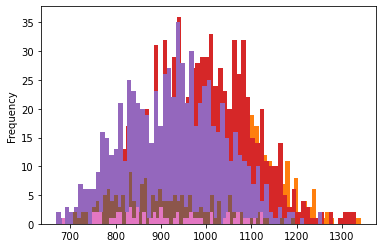

In [126]:
cls1['length'].plot(bins=60, kind='hist')
cls2['length'].plot(bins=60, kind='hist')
cls3['length'].plot(bins=60, kind='hist')
cls4['length'].plot(bins=60, kind='hist')
cls5['length'].plot(bins=60, kind='hist')
cls6['length'].plot(bins=60, kind='hist')
cls7['length'].plot(bins=60, kind='hist')

In [127]:
print( 'cls1 percentage =', (len(cls1) / len(train) )*100,"%")
print( 'cls2 percentage =', (len(cls2) / len(train) )*100,"%")
print( 'cls3 percentage =', (len(cls3) / len(train) )*100,"%")
print( 'cls4 percentage =', (len(cls4) / len(train) )*100,"%")
print( 'cls5 percentage =', (len(cls5) / len(train) )*100,"%")
print( 'cls6 percentage =', (len(cls6) / len(train) )*100,"%")
print( 'cls7 percentage =', (len(cls7) / len(train) )*100,"%")

cls1 percentage = 2.646436132674665 %
cls2 percentage = 14.855328158080452 %
cls3 percentage = 29.4636556104446 %
cls4 percentage = 29.4636556104446 %
cls5 percentage = 26.182074805928018 %
cls6 percentage = 5.892731122088921 %
cls7 percentage = 1.9760056457304165 %


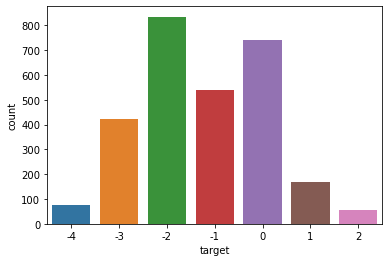

In [128]:
sns.countplot(train['target'], label = "Count") 

In [129]:
#STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING STEP 3.1 EXERCISE: REMOVE PUNCTUATION

In [130]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [131]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [132]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [133]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [134]:
#STEP 3.2 EXERCISE: REMOVE STOPWORDS

In [135]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [136]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [138]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [139]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [140]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

In [141]:
#STEP 3.3 EXERCISE: COUNT VECTORIZER EXAMPLE

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [143]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [144]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [145]:
#LET'S APPLY THE PREVIOUS THREE PROCESSES TO OUR SPAM/HAM EXAMPLE

In [146]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [147]:
# Let's test the newly added function
train_clean = train['excerpt'].apply(message_cleaning)

In [186]:
test_clean = test['excerpt'].apply(message_cleaning)

In [149]:
print(train_clean[0])

['young', 'people', 'returned', 'ballroom', 'presented', 'decidedly', 'changed', 'appearance', 'Instead', 'interior', 'scene', 'winter', 'landscape', 'floor', 'covered', 'snowwhite', 'canvas', 'laid', 'smoothly', 'rumpled', 'bumps', 'hillocks', 'like', 'real', 'snow', 'field', 'numerous', 'palms', 'evergreens', 'decorated', 'room', 'powdered', 'flour', 'strewn', 'tufts', 'cotton', 'like', 'snow', 'Also', 'diamond', 'dust', 'lightly', 'sprinkled', 'glittering', 'crystal', 'icicles', 'hung', 'branches', 'end', 'room', 'wall', 'hung', 'beautiful', 'bearskin', 'rug', 'rugs', 'prizes', 'one', 'girls', 'one', 'boys', 'game', 'girls', 'gathered', 'one', 'end', 'room', 'boys', 'one', 'end', 'called', 'North', 'Pole', 'South', 'Pole', 'player', 'given', 'small', 'flag', 'plant', 'reaching', 'Pole', 'would', 'easy', 'matter', 'traveller', 'obliged', 'wear', 'snowshoes']


In [187]:
print(test_clean[0])

['hope', 'lay', 'Jacks', 'promise', 'would', 'keep', 'bright', 'light', 'burning', 'upper', 'story', 'guide', 'course', 'clear', 'night', 'light', 'visible', 'village', 'somehow', 'failed', 'take', 'account', 'state', 'weather', 'air', 'full', 'eddying', 'flakes', 'would', 'render', 'headlight', 'locomotive', 'invisible', 'hundred', 'yards', 'distant', 'Strange', 'important', 'fact', 'never', 'occurred', 'fully', 'fourth', 'mile', 'village', 'looking', 'vain', 'beacon', 'light', 'danger', 'situation', 'struck', 'halted', 'certain', 'go', 'wrong', 'said', 'power', 'follow', 'direct', 'course', 'without', 'something', 'serve', 'compass', 'go', 'back', 'village', 'wait', 'till', 'morning']


In [151]:
print(train['excerpt'][0])

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes.


In [188]:
print(test['excerpt'][0])

My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.
"I am certain to go wrong," I said to myself.
"It is out of my power to follow a direct course without something to serve as a compass. I will go back to the village and wait till morning."


In [153]:
#LET'S APPLY COUNT VECTORIZER TO OUR MESSAGES LIST¶

In [266]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(train['excerpt'])


In [236]:
len(spamham_countvectorizer.toarray())

2834

In [270]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer1 = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer1 = vectorizer.transform(test['excerpt'])

In [271]:
len(spamham_countvectorizer1.toarray())

7

In [272]:
len(spamham_countvectorizer.toarray())

2834

In [273]:
len(vectorizer.get_feature_names())


32962

In [254]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [255]:
print(spamham_countvectorizer1.toarray())  

[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [256]:
spamham_countvectorizer.shape

(2834, 32962)

In [257]:
spamham_countvectorizer1.shape

(7, 456)

In [162]:
#STEP#4: TRAINING THE MODEL WITH ALL DATASET¶

In [163]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = train['target'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [164]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [165]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 0])

In [166]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 0])

In [ ]:
#STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING¶

In [274]:
X_train = spamham_countvectorizer
y_train = label
X_test = spamham_countvectorizer1

In [260]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [195]:
y_train

array([ 0,  0, -1, ...,  0,  0,  0])

In [261]:
X_test.toarray()

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [275]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2834, 32962)
(2834,)
(7, 32962)


In [276]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#STEP#5: EVALUATING THE MODEL

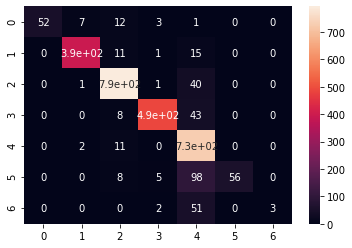

In [277]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [278]:
from sklearn.metrics import mean_squared_error
import math
score1 = max(0, 100-np.sqrt(mean_squared_error(y_train,y_predict_train)))
print(score1)

99.42561130651207


In [338]:
# Predicting the Test set results
#prediction1
y_predict_test = NB_classifier.predict(X_test)

In [339]:
y_predict_test

array([-2,  0,  0, -2, -2,  0,  0])

In [340]:
sf1=pd.DataFrame(y_predict_test,columns=['target'])

In [341]:
df1= pd.concat([test.id,sf1['target']], axis=1)

In [342]:
df1

,id,target
0,c0f722661,-2
1,f0953f0a5,0
2,0df072751,0
3,04caf4e0c,-2
4,0e63f8bea,-2
5,12537fe78,0
6,965e592c0,0


In [373]:
df1.to_csv('prediction1.csv',index=False)

In [346]:
#prediction2

In [347]:
an_y_predict_test=y_predict_test

In [348]:
for i in range(len(an_y_predict_test)):
    if an_y_predict_test[i]<=0:
        an_y_predict_test[i]=0   

In [349]:
an_y_predict_test

array([0, 0, 0, 0, 0, 0, 0])

In [350]:
sf2=pd.DataFrame(an_y_predict_test,columns=['target'])

In [351]:
df2= pd.concat([test.id,sf2['target']], axis=1)

In [352]:
df2

,id,target
0,c0f722661,0
1,f0953f0a5,0
2,0df072751,0
3,04caf4e0c,0
4,0e63f8bea,0
5,12537fe78,0
6,965e592c0,0


In [370]:
df2.to_csv('prediction2.csv',index=False)

In [ ]:
# By using TfidfTransformer

In [313]:
spamham_countvectorizer

<2834x32962 sparse matrix of type '<class 'numpy.int64'>'
	with 204391 stored elements in Compressed Sparse Row format>

In [290]:
from sklearn.feature_extraction.text import TfidfTransformer
emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)

print(emails_tfidf.shape)

(2834, 32962)


In [291]:
emails_tfidf1 = TfidfTransformer().fit_transform(spamham_countvectorizer1)

In [285]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 32829)	0.05866154604012275
  (0, 32698)	0.03998658311307555
  (0, 32511)	0.075803609586359
  (0, 32189)	0.09614821761208071
  (0, 32004)	0.08267507869920979
  (0, 31023)	0.12884605474766994
  (0, 30821)	0.11494102162015667
  (0, 29295)	0.12412489476999025
  (0, 28856)	0.13550015600754833
  (0, 28431)	0.12412489476999025
  (0, 28429)	0.13550015600754833
  (0, 28412)	0.16163047581496492
  (0, 28373)	0.11747079351011186
  (0, 28318)	0.05606677987521106
  (0, 27235)	0.09472027103499571
  (0, 26975)	0.12884605474766994
  (0, 26953)	0.12046287859093713
  (0, 26951)	0.12412489476999025
  (0, 26849)	0.19106838968718345
  (0, 26596)	0.08141206851523891
  (0, 25919)	0.07914487875475128
  (0, 25896)	0.09541871827067869
  (0, 25203)	0.12046287859093713
  (0, 25081)	0.09541871827067869
  (0, 24928)	0.11494102162015667
  :	:
  (2833, 16178)	0.05930169928690022
  (2833, 16109)	0.04913920517856923
  (2833, 15469)	0.06319537835134205
  (2833, 15447)	0.06975365193005753
  (2833, 15082)	0.085530842

In [354]:
X1 = emails_tfidf
y1 = label
X_train1=emails_tfidf
y_train1=label
X_test1=emails_tfidf1


In [355]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier1 = MultinomialNB()
NB_classifier1.fit(X_train1, y_train1)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_test1 = NB_classifier.predict(X_test1)
y_predict_test1


array([-2,  0,  0, -2, -2,  0,  0])

In [356]:
#prediction3

In [357]:
sf3=pd.DataFrame(y_predict_test1,columns=['target'])

In [358]:
df3= pd.concat([test.id,sf3['target']], axis=1)

In [359]:
df3

,id,target
0,c0f722661,-2
1,f0953f0a5,0
2,0df072751,0
3,04caf4e0c,-2
4,0e63f8bea,-2
5,12537fe78,0
6,965e592c0,0


In [371]:
df3.to_csv('prediction3.csv',index=False)

In [361]:
#prediction4

In [362]:
an_y_predict_test1=y_predict_test1


In [363]:
for i in range(len(an_y_predict_test1)):
    if an_y_predict_test1[i]<=0:
        an_y_predict_test1[i]=0   

In [364]:
an_y_predict_test1

array([0, 0, 0, 0, 0, 0, 0])

In [365]:
sf4=pd.DataFrame(an_y_predict_test1,columns=['target'])

In [366]:
df4= pd.concat([test.id,sf4['target']], axis=1)

In [367]:
df4

,id,target
0,c0f722661,0
1,f0953f0a5,0
2,0df072751,0
3,04caf4e0c,0
4,0e63f8bea,0
5,12537fe78,0
6,965e592c0,0


In [372]:
df4.to_csv('prediction4.csv',index=False)